In [1]:
import numpy as np
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
mo_obj_val = np.random.rand(3, 12)
mo_obj_val = (mo_obj_val - mo_obj_val.min()) / (mo_obj_val.max() - mo_obj_val.min())
loss_functions = ["NCC", "Grad", "Seg"]
axis_prop = None

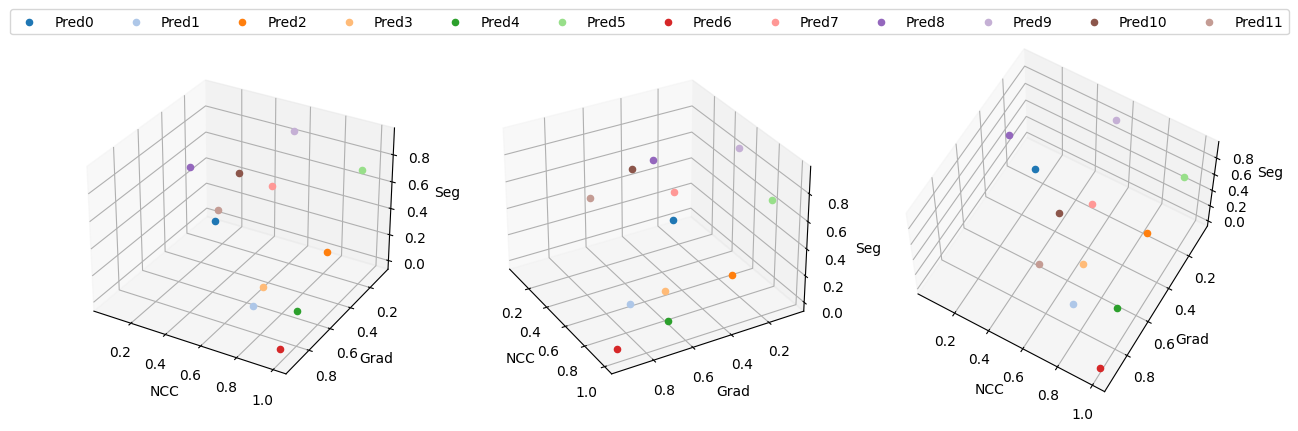

In [41]:
cmap = plt.cm.get_cmap('tab20', 20)
fig = plt.figure(figsize=(15,10), dpi=100)
view_list = [(30, -60, 0),
             (30, -30, 0),
             (60, -60, 0)] #elevation, azimuth, and roll

for i, view_angles in enumerate(view_list):
    elev, azim, roll = view_angles
    
    ax = fig.add_subplot(1,3,i+1, projection='3d')
    n_obj, n_sol = mo_obj_val.shape
    if i==1:
        for i_sol in range(n_sol):
            ax.scatter(mo_obj_val[0,i_sol], mo_obj_val[1,i_sol], mo_obj_val[2,i_sol], 
                        color=cmap(i_sol),
                        label=f"Pred{i_sol}")
                
        ax.legend(loc="upper center", ncols=n_sol, bbox_to_anchor=(-0.5, 0.15, 2, 1))
    else:
        for i_sol in range(n_sol):
            ax.scatter(mo_obj_val[0,i_sol], mo_obj_val[1,i_sol], mo_obj_val[2,i_sol], 
                    color=cmap(i_sol))
    
    ax.invert_yaxis()
    if axis_prop is not None:
        max_vals = axis_prop.get("max", [1, 1, 1])
        ax.set_xlim(0, max_vals[0])
        ax.set_ylim(0, max_vals[1])
        ax.set_zlim(0, max_vals[2])
        axis_limit = [(0, max_vals[0]), (0, max_vals[1]), (0, max_vals[2])]
    else:
        axis_limits = [ax.get_xlim(), ax.get_ylim(), ax.get_zlim()]

    # # inner corners
    # ax.plot(axis_limits[0], [0, 0], [0, 0], c='k')
    # ax.plot([0, 0], axis_limits[1], [0, 0], c='k')
    # ax.plot([0, 0], [0, 0], axis_limits[2],  c='k')
    ax.set_xlabel(loss_functions[0])
    ax.set_ylabel(loss_functions[1])
    ax.set_zlabel(loss_functions[2])
    # ax.set_title("Pareto front approximation")
    ax.view_init(elev, azim, roll)

plt.subplots_adjust(wspace=0.2)
plt.show()

In [37]:
axis_limits = [*ax.get_xlim(), *ax.get_ylim(), *ax.get_zlim()]

In [38]:
print(axis_limits)

[-0.05, 1.05, 0.9929495877631527, -0.04728331370300727, -0.04636098520977323, 0.9735806894052378]


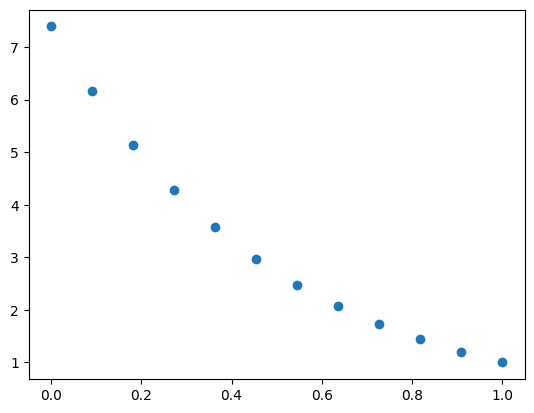

In [57]:
gamma_x = 2
gamma_y = 0
gamma_z = 1
x = np.linspace(0, 1, 12)
y = np.linspace(0, 1, 12)
z = np.linspace(0, 1, 12)
wx = np.exp(-x * gamma_x) / np.exp(-gamma_x)
wy = np.exp(-y * gamma_y) / np.exp(-gamma_y)
wz = np.exp(-z * gamma_z) / np.exp(-gamma_z)

plt.scatter(x, wx)
